# **Multivariate Linear Regression for Fish Weight Estimation From Measurements of the fish**

The aim of this study is to estimate weight of the fish from their measurements by using multivariate linear regression. 
This study can be used in fish farms. Individual fish swimming in front of the camera can be measured from the video image and the weight of the fish can be estimated through the linear regression model.

## ***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ***Import Dataset***

In [3]:
df = pd.read_csv('/content/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## ***Explore Dataset***

### ***Meaning of columns***

1.   Species : Species name of fish
2.   Weight : Weight of fish in gram
3.   Length1 : Vertical lenght in cm
4.   Length2 : Diagonal lenght in cm
5.   Length3 : Cross lenght in cm
6.   Height : Height in cm
7.   Width : Diagonal width in cm 




**Dependent variable** : Weight

**Independent variable** : all the other columns(measurements) except Weight

We will use idependent variables to estimate dependent variable i.e. weight

### ***Changing the column names***

In [4]:
df.rename(columns={'Length1': 'VerticalLen', 'Length2':'DiagonalLen', 'Length3':'CrossLen'}, inplace=True)
df.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### ***Investigating missing values***

In [8]:
print('Is there any NaN value in the dataset :', df.isnull().values.any())

Is there any NaN value in the dataset : False


### ***Different species and their counts***

In [11]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


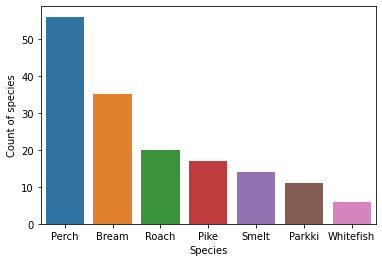

In [12]:
sns.barplot(x =sp.index, y = sp['Species'])
plt.xlabel('Species')
plt.ylabel('Count of species')
plt.show()

### ***Correlation of Variables***

In [13]:
df.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


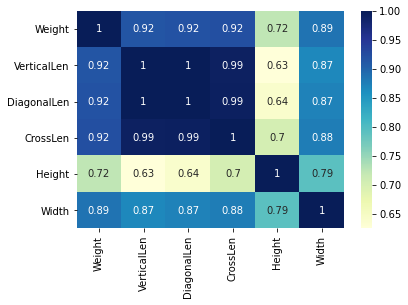

In [14]:
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu')

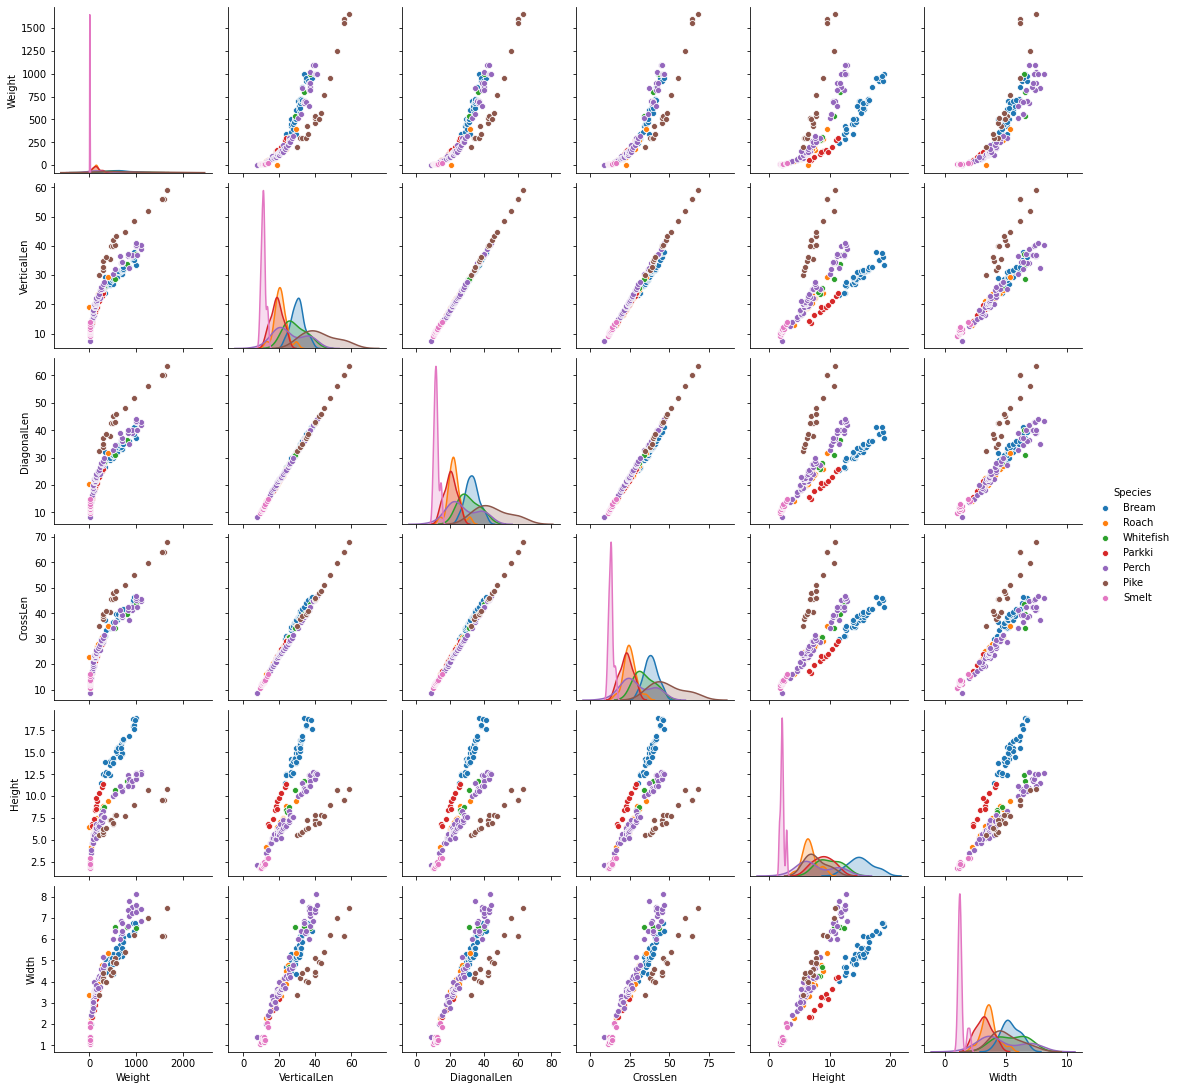

In [15]:
g = sns.pairplot(df, kind = 'scatter', hue = 'Species')

### ***Analysing and Dealing with Outliers***

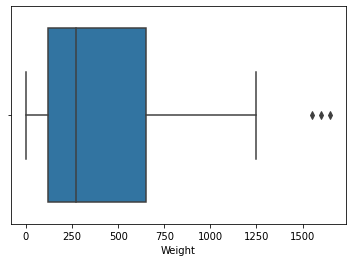

In [16]:
sns.boxplot(x = df['Weight'])

In [20]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [21]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend) ]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

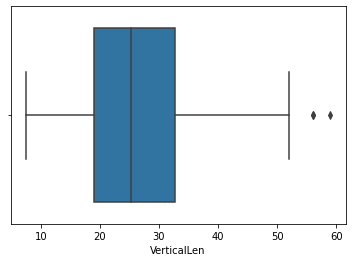

In [22]:
sns.boxplot(x= df['VerticalLen'])

In [24]:
dflv = df['VerticalLen']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: VerticalLen, dtype: float64

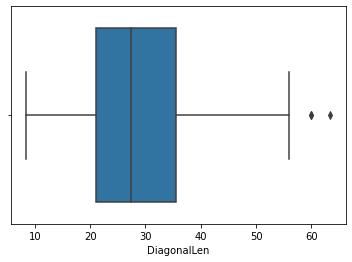

In [25]:
sns.boxplot(x= df['DiagonalLen'])

In [26]:
dflv = df['DiagonalLen']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    60.0
143    60.0
144    63.4
Name: DiagonalLen, dtype: float64

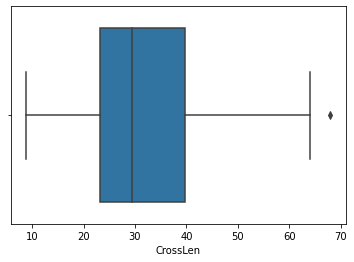

In [27]:
sns.boxplot(x = df['CrossLen'])

In [28]:
dflv = df['CrossLen']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

144    68.0
Name: CrossLen, dtype: float64

### ***Outliers of the dataset***

In [29]:
df[142:145]

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In our dataset 142, 143 and 144 are the outliers, Let's remove them

In [30]:
df1 = df.drop([142,143,144])
df1.describe()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


### ***Prepare the model :***

In [32]:
#Dependent variable
y = df1['Weight']
#Independent variable 
X = df1.iloc[:,2:]
X

,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


### ***Split the training and test dataset***

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
print('samples in dataset : ')
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_train: ', y_train.shape)

samples in dataset : 
X_train:  (124, 5)
X_test:  (32, 5)
y_train:  (124,)
y_train:  (124,)


**Multiple Linear Regression Formula:**

y = b0 + b1X1 + b2X2 + b3X3 + ... + bnXn

y : Dependent variable

b0 : Constant

b1 - bn : Coefficients

X1 - Xn : Independent variables

### ***Train the Model***

In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### ***Our trained model's generated formula :***

In [38]:
#parameters
print('Model intercept : ', reg.intercept_)
print('Model coefficients : ', reg.coef_)

Model intercept :  -441.0088725388172
Model coefficients :  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [39]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


### ***Predictions by uing model***

In [40]:
#predicting with training dataset
y_pred = reg.predict(X_train)

In [41]:
#r2 score
r2_score(y_train, y_pred)

0.9116039087262157

But if we change random_state our train and test samples will be different and our model's score will be different. In order to eliminate this change I will use cross validation:



In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.81965553 0.91733889 0.90970988 0.96003833 0.93655595 0.86878097
 0.91955783 0.8518532  0.84071059 0.81121078]


There are 10 different versions of r2 scores using my model (reg). If I get the average of this I can achieve cross validated r2 score of my training model:

In [43]:
cross_val_score_train.mean()

0.8835411966576627

using trained model to get predictions on test dataset

In [45]:
y_test_pred = reg.predict(X_test)

In [46]:
#r2 score
r2_score(y_test,y_test_pred)

0.8671964388742472

### ***VISUALISATION OF THE PREDICTIONS:***

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

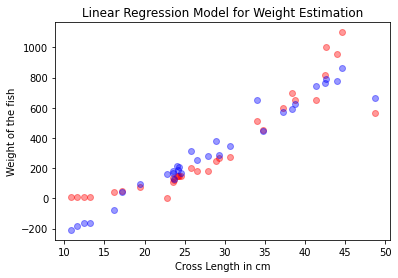

In [48]:
plt.scatter(X_test['CrossLen'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['CrossLen'], y_test_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

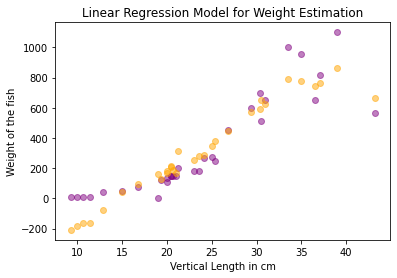

In [49]:
plt.scatter(X_test['VerticalLen'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['VerticalLen'], y_test_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

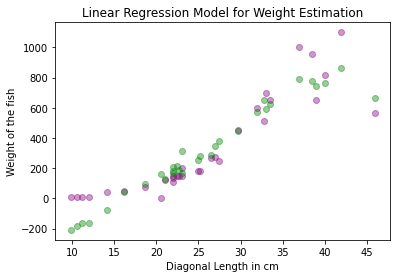

In [50]:
plt.scatter(X_test['DiagonalLen'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['DiagonalLen'], y_test_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

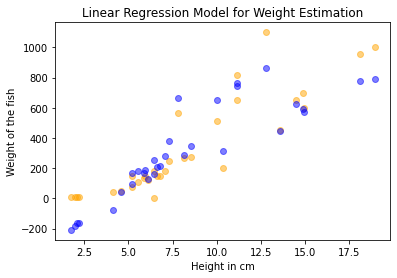

In [51]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_test_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

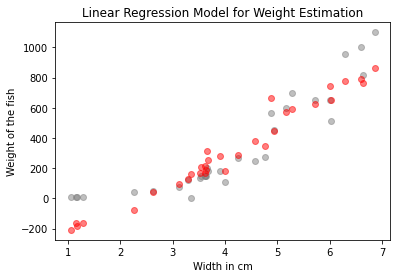

In [52]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_test_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

### ***COMPARING REAL AND PREDICTED WEIGHTS***

In [53]:
y_pred1 = pd.DataFrame(y_test_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289


In [54]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [55]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074
